# Google Capstone Project: Shared Bike Analysis

## Data process and analysis section

## Import related libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()

## Import raw data

In [2]:
# data is seperated into 12 different files
raw_data_20_08 = pd.read_csv('202008-divvy-tripdata.csv')
raw_data_20_09 = pd.read_csv('202009-divvy-tripdata.csv')
raw_data_20_10 = pd.read_csv('202010-divvy-tripdata.csv')
raw_data_20_11 = pd.read_csv('202011-divvy-tripdata.csv')
raw_data_20_12 = pd.read_csv('202012-divvy-tripdata.csv')
raw_data_21_01 = pd.read_csv('202101-divvy-tripdata.csv')
raw_data_21_02 = pd.read_csv('202102-divvy-tripdata.csv')
raw_data_21_03 = pd.read_csv('202103-divvy-tripdata.csv')
raw_data_21_04 = pd.read_csv('202104-divvy-tripdata.csv')
raw_data_21_05 = pd.read_csv('202105-divvy-tripdata.csv')
raw_data_21_06 = pd.read_csv('202106-divvy-tripdata.csv')
raw_data_21_07 = pd.read_csv('202107-divvy-tripdata.csv')

## Preview data, modify data type, combine all the data into one file

In [3]:
raw_data_20_08.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,41.915689,-87.634600,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,41.864221,-87.623439,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195.0,State St & Randolph St,44.0,41.884641,-87.619549,41.884971,-87.627574,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,41.889583,-87.627540,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,41.903002,-87.683844,casual


In [4]:
raw_data_20_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622361 entries, 0 to 622360
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             622361 non-null  object 
 1   rideable_type       622361 non-null  object 
 2   started_at          622361 non-null  object 
 3   ended_at            622361 non-null  object 
 4   start_station_name  614766 non-null  object 
 5   start_station_id    614670 non-null  float64
 6   end_station_name    612326 non-null  object 
 7   end_station_id      612251 non-null  float64
 8   start_lat           622361 non-null  float64
 9   start_lng           622361 non-null  float64
 10  end_lat             621423 non-null  float64
 11  end_lng             621423 non-null  float64
 12  member_casual       622361 non-null  object 
dtypes: float64(6), object(7)
memory usage: 61.7+ MB


In [5]:
raw_data_20_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532958 entries, 0 to 532957
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             532958 non-null  object 
 1   rideable_type       532958 non-null  object 
 2   started_at          532958 non-null  object 
 3   ended_at            532958 non-null  object 
 4   start_station_name  513267 non-null  object 
 5   start_station_id    513057 non-null  float64
 6   end_station_name    509585 non-null  object 
 7   end_station_id      509434 non-null  float64
 8   start_lat           532958 non-null  float64
 9   start_lng           532958 non-null  float64
 10  end_lat             532169 non-null  float64
 11  end_lng             532169 non-null  float64
 12  member_casual       532958 non-null  object 
dtypes: float64(6), object(7)
memory usage: 52.9+ MB


In [6]:
raw_data_20_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388653 entries, 0 to 388652
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             388653 non-null  object 
 1   rideable_type       388653 non-null  object 
 2   started_at          388653 non-null  object 
 3   ended_at            388653 non-null  object 
 4   start_station_name  357455 non-null  object 
 5   start_station_id    357248 non-null  float64
 6   end_station_name    353022 non-null  object 
 7   end_station_id      352866 non-null  float64
 8   start_lat           388653 non-null  float64
 9   start_lng           388653 non-null  float64
 10  end_lat             388179 non-null  float64
 11  end_lng             388179 non-null  float64
 12  member_casual       388653 non-null  object 
dtypes: float64(6), object(7)
memory usage: 38.5+ MB


In [7]:
raw_data_20_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259716 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             259716 non-null  object 
 1   rideable_type       259716 non-null  object 
 2   started_at          259716 non-null  object 
 3   ended_at            259716 non-null  object 
 4   start_station_name  235392 non-null  object 
 5   start_station_id    235282 non-null  float64
 6   end_station_name    232967 non-null  object 
 7   end_station_id      232890 non-null  float64
 8   start_lat           259716 non-null  float64
 9   start_lng           259716 non-null  float64
 10  end_lat             259432 non-null  float64
 11  end_lng             259432 non-null  float64
 12  member_casual       259716 non-null  object 
dtypes: float64(6), object(7)
memory usage: 25.8+ MB


In [8]:
raw_data_20_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131573 entries, 0 to 131572
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             131573 non-null  object 
 1   rideable_type       131573 non-null  object 
 2   started_at          131573 non-null  object 
 3   ended_at            131573 non-null  object 
 4   start_station_name  119874 non-null  object 
 5   start_station_id    119874 non-null  object 
 6   end_station_name    118336 non-null  object 
 7   end_station_id      118336 non-null  object 
 8   start_lat           131573 non-null  float64
 9   start_lng           131573 non-null  float64
 10  end_lat             131462 non-null  float64
 11  end_lng             131462 non-null  float64
 12  member_casual       131573 non-null  object 
dtypes: float64(4), object(9)
memory usage: 13.0+ MB


In [9]:
raw_data_21_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


In [10]:
raw_data_21_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             49622 non-null  object 
 1   rideable_type       49622 non-null  object 
 2   started_at          49622 non-null  object 
 3   ended_at            49622 non-null  object 
 4   start_station_name  45576 non-null  object 
 5   start_station_id    45576 non-null  object 
 6   end_station_name    44264 non-null  object 
 7   end_station_id      44264 non-null  object 
 8   start_lat           49622 non-null  float64
 9   start_lng           49622 non-null  float64
 10  end_lat             49408 non-null  float64
 11  end_lng             49408 non-null  float64
 12  member_casual       49622 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.9+ MB


In [11]:
raw_data_21_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             228496 non-null  object 
 1   rideable_type       228496 non-null  object 
 2   started_at          228496 non-null  object 
 3   ended_at            228496 non-null  object 
 4   start_station_name  213648 non-null  object 
 5   start_station_id    213648 non-null  object 
 6   end_station_name    211769 non-null  object 
 7   end_station_id      211769 non-null  object 
 8   start_lat           228496 non-null  float64
 9   start_lng           228496 non-null  float64
 10  end_lat             228329 non-null  float64
 11  end_lng             228329 non-null  float64
 12  member_casual       228496 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.7+ MB


In [12]:
raw_data_21_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337230 entries, 0 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337230 non-null  object 
 1   rideable_type       337230 non-null  object 
 2   started_at          337230 non-null  object 
 3   ended_at            337230 non-null  object 
 4   start_station_name  311174 non-null  object 
 5   start_station_id    311174 non-null  object 
 6   end_station_name    309056 non-null  object 
 7   end_station_id      309056 non-null  object 
 8   start_lat           337230 non-null  float64
 9   start_lng           337230 non-null  float64
 10  end_lat             336963 non-null  float64
 11  end_lng             336963 non-null  float64
 12  member_casual       337230 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.4+ MB


In [13]:
raw_data_21_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531633 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             531633 non-null  object 
 1   rideable_type       531633 non-null  object 
 2   started_at          531633 non-null  object 
 3   ended_at            531633 non-null  object 
 4   start_station_name  477889 non-null  object 
 5   start_station_id    477889 non-null  object 
 6   end_station_name    473439 non-null  object 
 7   end_station_id      473439 non-null  object 
 8   start_lat           531633 non-null  float64
 9   start_lng           531633 non-null  float64
 10  end_lat             531181 non-null  float64
 11  end_lng             531181 non-null  float64
 12  member_casual       531633 non-null  object 
dtypes: float64(4), object(9)
memory usage: 52.7+ MB


In [14]:
raw_data_21_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729595 entries, 0 to 729594
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             729595 non-null  object 
 1   rideable_type       729595 non-null  object 
 2   started_at          729595 non-null  object 
 3   ended_at            729595 non-null  object 
 4   start_station_name  649502 non-null  object 
 5   start_station_id    649502 non-null  object 
 6   end_station_name    643208 non-null  object 
 7   end_station_id      643208 non-null  object 
 8   start_lat           729595 non-null  float64
 9   start_lng           729595 non-null  float64
 10  end_lat             728878 non-null  float64
 11  end_lng             728878 non-null  float64
 12  member_casual       729595 non-null  object 
dtypes: float64(4), object(9)
memory usage: 72.4+ MB


In [15]:
raw_data_21_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822410 entries, 0 to 822409
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             822410 non-null  object 
 1   rideable_type       822410 non-null  object 
 2   started_at          822410 non-null  object 
 3   ended_at            822410 non-null  object 
 4   start_station_name  735147 non-null  object 
 5   start_station_id    735148 non-null  object 
 6   end_station_name    729252 non-null  object 
 7   end_station_id      729252 non-null  object 
 8   start_lat           822410 non-null  float64
 9   start_lng           822410 non-null  float64
 10  end_lat             821679 non-null  float64
 11  end_lng             821679 non-null  float64
 12  member_casual       822410 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.6+ MB


In [16]:
# note that from file "20_08" to "20_11" the data type of stattion_id are "float". Convert data type to "object"
raw_data_20_08[['start_station_id','end_station_id']] = raw_data_20_08[['start_station_id','end_station_id']].astype('object')
raw_data_20_09[['start_station_id','end_station_id']] = raw_data_20_09[['start_station_id','end_station_id']].astype('object')
raw_data_20_10[['start_station_id','end_station_id']] = raw_data_20_10[['start_station_id','end_station_id']].astype('object')
raw_data_20_11[['start_station_id','end_station_id']] = raw_data_20_11[['start_station_id','end_station_id']].astype('object')

In [17]:
raw_data_20_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622361 entries, 0 to 622360
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             622361 non-null  object 
 1   rideable_type       622361 non-null  object 
 2   started_at          622361 non-null  object 
 3   ended_at            622361 non-null  object 
 4   start_station_name  614766 non-null  object 
 5   start_station_id    614670 non-null  object 
 6   end_station_name    612326 non-null  object 
 7   end_station_id      612251 non-null  object 
 8   start_lat           622361 non-null  float64
 9   start_lng           622361 non-null  float64
 10  end_lat             621423 non-null  float64
 11  end_lng             621423 non-null  float64
 12  member_casual       622361 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.7+ MB


In [18]:
# combine all dataset into one file
raw_data_merge = raw_data_20_08.append([raw_data_20_09,raw_data_20_10,raw_data_20_11,raw_data_20_12,
                                        raw_data_21_01,raw_data_21_02,raw_data_21_03,
                                        raw_data_21_04,raw_data_21_05,raw_data_21_06,raw_data_21_07])

In [19]:
raw_data_merge = raw_data_merge.reset_index()
raw_data_merge = raw_data_merge.drop(['index'],axis = 1)
raw_data_merge
# data has been merged, including 4,731,081 records and 13 columns

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,41.915689,-87.634600,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,41.864221,-87.623439,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195.0,State St & Randolph St,44.0,41.884641,-87.619549,41.884971,-87.627574,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,41.889583,-87.627540,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,41.903002,-87.683844,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731076,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.770000,-87.660000,member
4731077,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
4731078,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
4731079,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


In [20]:
raw_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731081 entries, 0 to 4731080
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 469.2+ MB


In [21]:
raw_data_merge[['started_at','ended_at']].head()

,started_at,ended_at
0,2020-08-20 18:08:14,2020-08-20 18:17:51
1,2020-08-27 18:46:04,2020-08-27 19:54:51
2,2020-08-26 19:44:14,2020-08-26 21:53:07
3,2020-08-27 12:05:41,2020-08-27 12:53:45
4,2020-08-27 16:49:02,2020-08-27 16:59:49


In [22]:
# convert data type of "started_at" and "ended_at" from "object" to "datetime"
raw_data_merge['started_at'] = pd.to_datetime(raw_data_merge['started_at'], format = '%Y-%m-%d %H:%M:%S' )
raw_data_merge['ended_at'] = pd.to_datetime(raw_data_merge['ended_at'], format = '%Y-%m-%d %H:%M:%S' )

In [23]:
raw_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731081 entries, 0 to 4731080
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 469.2+ MB


## Checking missing values, duplicated records

In [24]:
raw_data_merge.duplicated().describe()
# no duplicated records

count     4731081
unique          1
top         False
freq      4731081
dtype: object

In [25]:
raw_data_merge.shape

(4731081, 13)

In [26]:
raw_data_merge.drop_duplicates().shape

(4731081, 13)

In [27]:
raw_data_merge.isnull().sum()
# The dataset contains around 10% missing value in columns "station_name" and "station_id". 
# However, note that there is no missing value in "start_lat" and "start_lng", and around 0.1% missing value in "end_lat" and "end_lng", 
# These value represent the location of station.
# I will use these value for further analysis instead of station name.

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    369182
start_station_id      369804
end_station_name      407300
end_station_id        407759
start_lat                  0
start_lng                  0
end_lat                 5247
end_lng                 5247
member_casual              0
dtype: int64

In [28]:
# Create check point
raw_data_merge_copy = raw_data_merge.copy()

## Manipulate dataset, create variables of interest for analysis

In [29]:
# round the value in "lat" and "lng"
raw_data_merge_copy['start_lat_round'] = raw_data_merge_copy['start_lat'].round(3)
raw_data_merge_copy['start_lng_round'] = raw_data_merge_copy['start_lng'].round(3)
raw_data_merge_copy['end_lat_round'] = raw_data_merge_copy['end_lat'].round(3)
raw_data_merge_copy['end_lng_round'] = raw_data_merge_copy['end_lng'].round(3)

# combine latitude and longitude into one column
raw_data_merge_copy['start_location'] = raw_data_merge_copy['start_lat_round'].map(str) + "/" + raw_data_merge_copy['start_lng_round'].map(str)
raw_data_merge_copy['end_location'] = raw_data_merge_copy['end_lat_round'].round(3).map(str) + "/" + raw_data_merge_copy['end_lng_round'].round(3).map(str)
raw_data_merge_copy[['start_location','end_location']].head()

,start_location,end_location
0,41.933/-87.636,41.916/-87.635
1,41.864/-87.624,41.864/-87.623
2,41.885/-87.62,41.885/-87.628
3,41.884/-87.63,41.89/-87.628
4,41.903/-87.684,41.903/-87.684


In [30]:
# calculate year, month, day of week, hour
raw_data_merge_copy['year'] = raw_data_merge_copy['started_at'].dt.year
raw_data_merge_copy['month'] = raw_data_merge_copy['started_at'].dt.month
raw_data_merge_copy['day_of_week'] = raw_data_merge_copy['started_at'].dt.day_name()
raw_data_merge_copy['hour'] = raw_data_merge_copy['started_at'].dt.hour
raw_data_merge_copy[['year','month','hour']] = raw_data_merge_copy[['year','month','hour']].astype('object')

In [31]:
# calculate ride duration
raw_data_merge_copy['ride_duration'] = (raw_data_merge_copy['ended_at'] - raw_data_merge_copy['started_at']).values/np.timedelta64(1,'h')
raw_data_merge_copy[['year','month','hour','day_of_week','ride_duration']].head()

,year,month,hour,day_of_week,ride_duration
0,2020,8,18,Thursday,0.160278
1,2020,8,18,Thursday,1.146389
2,2020,8,19,Wednesday,2.148056
3,2020,8,12,Thursday,0.801111
4,2020,8,16,Thursday,0.179722


In [32]:
raw_data_merge_copy['ride_duration'].describe()

count    4.731081e+06
mean     3.699713e-01
std      5.554284e+00
min     -4.841661e+02
25%      1.219444e-01
50%      2.194444e-01
75%      4.013889e-01
max      9.324025e+02
Name: ride_duration, dtype: float64

In [33]:
# note that there are negative values in "ride_duration"
# remove those bad data
cleaned_data = raw_data_merge_copy.drop(raw_data_merge_copy[raw_data_merge_copy.ride_duration<=0].index)

In [34]:
cleaned_data = cleaned_data.reset_index()
cleaned_data = cleaned_data.drop(['index'], axis=1)

In [35]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722462 entries, 0 to 4722461
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_lat_round     float64       
 14  start_lng_round     float64       
 15  end_lat_round       float64       
 16  end_lng_round       float64       
 17  start_location      object        
 18  end_location        object        
 19  year                object        
 20  mo

## Data analysis

### Calculation the usage different between member and casual riders

In [36]:
# check the usage count for member or casual riders
count_mem_cas = cleaned_data.groupby(['rideable_type','member_casual']).count().reset_index()[['rideable_type','member_casual','ride_id']]

In [37]:
count_mem_cas

,rideable_type,member_casual,ride_id
0,classic_bike,casual,695197
1,classic_bike,member,1090180
2,docked_bike,casual,757973
3,docked_bike,member,792294
4,electric_bike,casual,646272
5,electric_bike,member,740546


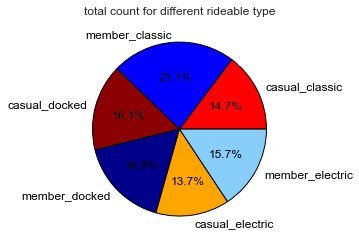

In [38]:
# create pie chart
labels = ["casual_classic","member_classic","casual_docked","member_docked","casual_electric","member_electric"]
colours = ["red","blue","darkred","darkblue","orange","lightskyblue"]
plt.axes(aspect='equal')
plt.pie(x = count_mem_cas['ride_id'], labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        autopct = "%1.1f%%",
        textprops= {'fontsize':12,'color':'black'})
plt.xticks(())
plt.yticks(())
plt.title('total count for different rideable type')
plt.show()

In [39]:
# calculate the total duration
sum_mem_cas = cleaned_data.groupby(['rideable_type','member_casual']).sum().reset_index()[['rideable_type','member_casual','ride_duration']]

In [40]:
sum_mem_cas

,rideable_type,member_casual,ride_duration
0,classic_bike,casual,351988.781389
1,classic_bike,member,267741.244444
2,docked_bike,casual,702125.876389
3,docked_bike,member,208806.983611
4,electric_bike,casual,232238.874722
5,electric_bike,member,167714.184167


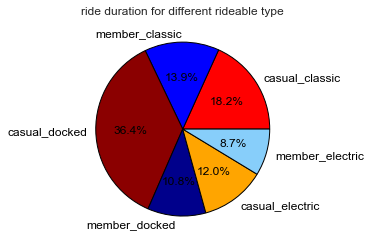

In [41]:
# create pie chart
labels = ["casual_classic","member_classic","casual_docked","member_docked","casual_electric","member_electric"]
colours = ["red","blue","darkred","darkblue","orange","lightskyblue"]
plt.axes(aspect='equal')
plt.pie(x = sum_mem_cas['ride_duration'], labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        autopct = "%1.1f%%",
        textprops= {'fontsize':12,'color':'black'})
plt.xticks(())
plt.yticks(())
plt.title('ride duration for different rideable type')
plt.show()

### Calculate the most popular station for shared bike

In [42]:
# calculate count for different location
count_start_location = cleaned_data.groupby(['start_location']).count().reset_index()[['start_location','ride_id']]
most_frequent_location = count_start_location.sort_values(by ='ride_id',axis=0,ascending=False).head(20)

In [43]:
most_frequent_location = most_frequent_location.reset_index()
most_frequent_location = most_frequent_location.drop(['index'], axis=1)

In [44]:
most_frequent_location['station_name'] = np.nan

In [45]:
most_frequent_location

,start_location,ride_id,station_name
0,41.892/-87.612,66498,NaN
1,41.881/-87.617,45622,NaN
2,41.912/-87.627,42277,NaN
3,41.926/-87.631,40283,NaN
4,41.901/-87.624,38356,NaN
5,41.881/-87.624,36933,NaN
6,41.912/-87.635,36552,NaN
7,41.903/-87.631,31702,NaN
8,41.918/-87.636,31040,NaN
9,41.916/-87.635,30525,NaN


In [46]:
# find the station name for the specific location
for i in range(len(most_frequent_location)):
    location = most_frequent_location.iloc[i,0]
    station_name = cleaned_data.loc[cleaned_data['start_location']==location,['start_station_name']].reset_index()
    most_frequent_location.iloc[i,2] = station_name.iloc[i,1]

In [47]:
most_frequent_location

,start_location,ride_id,station_name
0,41.892/-87.612,66498,Streeter Dr & Grand Ave
1,41.881/-87.617,45622,Lake Shore Dr & Monroe St
2,41.912/-87.627,42277,Lake Shore Dr & North Blvd
3,41.926/-87.631,40283,Theater on the Lake
4,41.901/-87.624,38356,Michigan Ave & Oak St
5,41.881/-87.624,36933,Millennium Park
6,41.912/-87.635,36552,Wells St & Concord Ln
7,41.903/-87.631,31702,Clark St & Elm St
8,41.918/-87.636,31040,Clark St & Armitage Ave
9,41.916/-87.635,30525,Clark St & Lincoln Ave


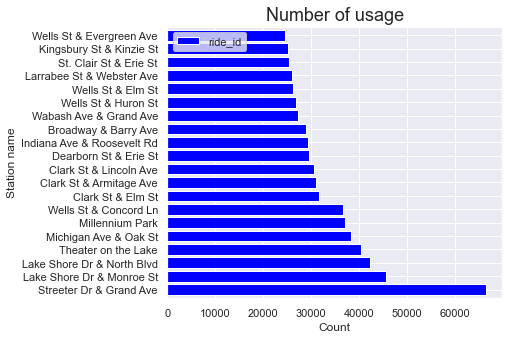

In [48]:
fig, ax = plt.subplots(figsize=(6, 5))
most_frequent_location.plot(x = 'station_name',kind = 'barh',mark_right = True,color=['blue'],width=0.8,ax=ax)
plt.xlabel('Count', size=12)
plt.ylabel('Station name', size=12)
plt.title('Number of usage', size=18)
plt.legend(loc='upper left');

### Calculate the count of rides usage at the breakdown of months, day of week and hours

In [49]:
# At breakdown of hours
count_hour = cleaned_data.groupby(['member_casual','hour']).count().reset_index()[['member_casual','hour','ride_id']]

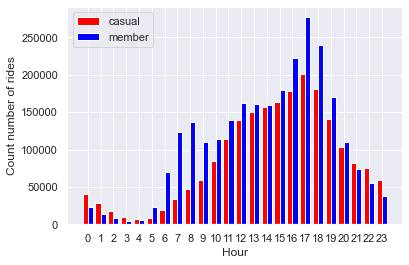

In [50]:
count_hour_casual = count_hour.loc[count_hour['member_casual']=='casual',:]
count_hour_member = count_hour.loc[count_hour['member_casual']=='member',:]
x = np.arange(24)
tick_label = count_hour_casual.loc[:,'hour']
bar_width = 0.4
plt.bar(x, count_hour_casual['ride_id'], bar_width, align='center', color='red',label='casual')
plt.bar(x+bar_width, count_hour_member['ride_id'], bar_width, align='center', color='blue',label='member')
plt.xlabel("Hour")
plt.ylabel("Count number of rides")
plt.xticks(x+bar_width/2, tick_label)
plt.legend()
plt.show()

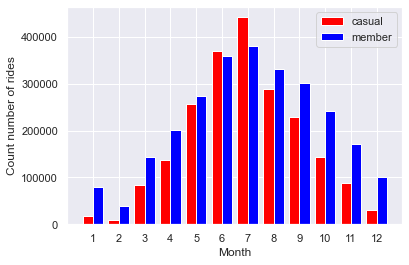

In [51]:
# At breakdown of months
count_month = cleaned_data.groupby(['member_casual','month']).count().reset_index()[['member_casual','month','ride_id']]
count_month_casual = count_month.loc[count_month['member_casual']=='casual',:]
count_month_member = count_month.loc[count_month['member_casual']=='member',:]
x = np.arange(12)
tick_label = count_month_casual.loc[:,'month']
bar_width = 0.4
plt.bar(x, count_month_casual['ride_id'], bar_width, align='center', color='red',label='casual')
plt.bar(x+bar_width, count_month_member['ride_id'], bar_width, align='center', color='blue',label='member')
plt.xlabel("Month")
plt.ylabel("Count number of rides")
plt.xticks(x+bar_width/2, tick_label)
plt.legend()
plt.show()

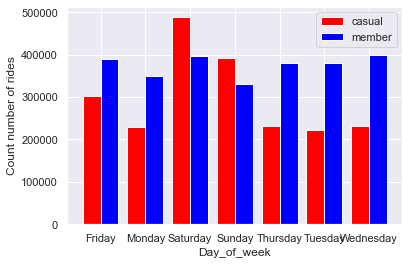

In [52]:
# At breakdown of day of week
count_day_of_week = cleaned_data.groupby(['member_casual','day_of_week']).count().reset_index()[['member_casual','day_of_week','ride_id']]
count_day_of_week_casual = count_day_of_week.loc[count_day_of_week['member_casual']=='casual',:]
count_day_of_week_member = count_day_of_week.loc[count_day_of_week['member_casual']=='member',:]
x = np.arange(7)
tick_label = count_day_of_week_casual.loc[:,'day_of_week']
bar_width = 0.4
plt.bar(x, count_day_of_week_casual['ride_id'], bar_width, align='center', color='red',label='casual')
plt.bar(x+bar_width, count_day_of_week_member['ride_id'], bar_width, align='center', color='blue',label='member')
plt.xlabel("Day_of_week")
plt.ylabel("Count number of rides")
plt.xticks(x+bar_width/2, tick_label)
plt.legend()
plt.show()

## Main findings:
1. Casual ride is also an important part for shared bike business, accounting for 44.5% of total rides and 66.6% total ride duration.
2. Casual rides have a distinguished peak value on Saturday and Sunday. On the other hand, member rides are relatively uniform during a week.
3. Both casual and member rides have a higher volumes in summer time (June, July, August).
4. Customers tends to use shared bike in afternoon, during 4pm to 6pm.
5. The most popular station for share bike is "Streeter Dr & Grand Ave".